In [11]:
%run th2fds.ipynb

In [2]:
def fileI(filename):
    tmp = []
    f = open(filename,'r');
    lines = f.readlines()
    for line in lines:
        tmp.append(line);
    out=np.zeros([len(tmp),2]);
    for i in range(len(out)):
        out[i,:] = np.array(tmp[i].split()).astype(np.float)
    return out;

In [3]:
data=fileI("th_fullPSD.txt");
data1=fileI("th_band1.txt");
data2=fileI("th_band2.txt");
data3=fileI("th_ovl_band1.txt");
data4=fileI("th_ovl_band2.txt");

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_21286/4169597666.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out[i,:] = np.array(tmp[i].split()).astype(np.float)


In [4]:
t,th=data[:,0],data[:,1];
t1,th1 = data1[:,0],data1[:,1];
t2,th2 = data2[:,0],data2[:,1];
t3,th3 = data3[:,0],data3[:,1];
t4,th4 = data4[:,0],data4[:,1];

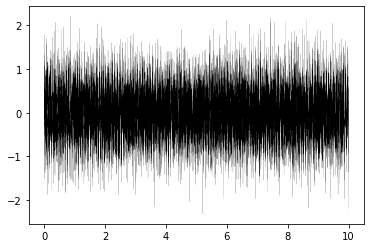

In [5]:
%matplotlib inline
plt.plot(t,th,'k-',lw=0.1);

In [6]:
data = fileI("PSD_full.txt");
data1 = fileI("PSD_band1.txt");
data2 = fileI("PSD_band2.txt");

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_21286/4169597666.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out[i,:] = np.array(tmp[i].split()).astype(np.float)


In [7]:
fi,pi=data[:,0],data[:,1];
fi1,pi1 = data1[:,0],data1[:,1];
fi2,pi2 = data2[:,0],data2[:,1];

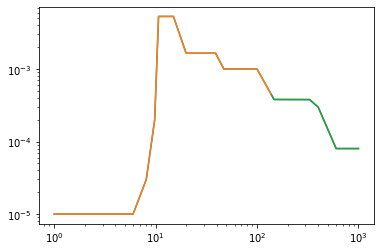

In [8]:
plt.loglog(fi,pi);
plt.loglog(fi1,pi1);
plt.loglog(fi2,pi2);

In [12]:
ft = np.logspace(1,3,100);

In [ ]:
fn,fd=th2fds_smallwood(lftab=ft,ldtab=th,dr=0.04,dtime=5e-5,it=1,K=1,m=8,C=1);
fn1,fd1=th2fds_smallwood(lftab=ft,ldtab=th1,dr=0.04,dtime=5e-5,it=1,K=1,m=8,C=1);
fn2,fd2=th2fds_smallwood(lftab=ft,ldtab=th2,dr=0.04,dtime=5e-5,it=1,K=1,m=8,C=1);

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/rainflow.py:58: RuntimeWarning: overflow encountered in double_scalars
  if d_last * d_next < 0:
/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/rainflow.py:86: RuntimeWarning: invalid value encountered in double_scalars
  mean = 0.5 * (x1 + x2)
/data/user/0/ru.iiec.pydroid3/cache/ipykernel_21286/1400516952.py:15: RuntimeWarning: overflow encountered in power
  fds[fl] = sum((rang**m)*cycle)/C;
/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/rainflow.py:57: RuntimeWarning: overflow encountered in double_scalars
  d_next = x_next - x
/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/rainflow.py:95: RuntimeWarning: overflow encountered in double_scalars
  X = abs(x3 - x2)
/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/rainflow.py:96: RuntimeWarning: overf

In [ ]:
plt.loglog(fn,fd);
plt.loglog(fn1,fd1);
plt.loglog(fn2,fd2);

In [ ]:
fn3,fd3=th2fds(lftab=ft,ldtab=th3,dr=0.04,dtime=5e-5,it=1,K=1,m=8,C=1);
fn4,fd4=th2fds(lftab=ft,ldtab=th4,dr=0.04,dtime=5e-5,it=1,K=1,m=8,C=1);

In [ ]:
plt.loglog(fn,fd);
plt.loglog(fn3,fd3);
plt.loglog(fn4,fd4);